70000000.0
0.6633249580710799


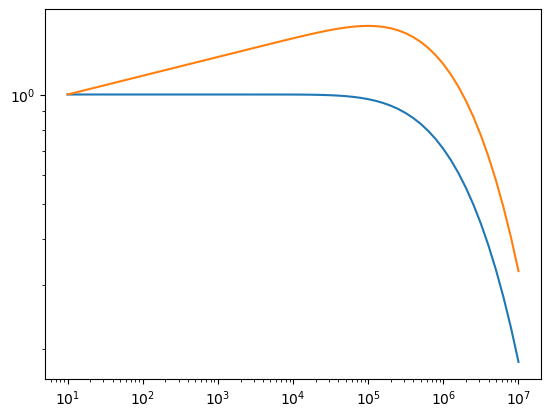

In [11]:
import matplotlib.pyplot as plt
import numpy as np

pc = 3e18
z0 = 96*pc
u1 = 2.8e8
u2 = u1/4
etaB = 0.01
vA1 = u1*np.sqrt(etaB)
vA2 = u1*np.sqrt(etaB) * (np.sqrt(11)/2)

Sqrt_Delta = np.sqrt(np.power(u2,2)-4/9*np.power(vA2,2))

print(u2)
print(vA2/u2)

# D1 = 1.4e26*np.power(0.01,-1/6)*np.power(1.5,-1/15)*np.power(2.8,-2/15)*np.power(2,-1/10)*np.power(3/10,2/15)
def D1_fun(p_):
    return 2e26*np.power(p_/1e0, 1/3)

def D2_fun(p_):
    return 0.67*2e26*np.power(p_/1e0, 1/3)

p = np.power(10, np.linspace(1, 7, num=6001, endpoint=True)) # GeV/c
p_sparse = np.power(10, np.linspace(1, 7, num=61, endpoint=True)) # GeV/c

D1 = D1_fun(p)
D2 = D2_fun(p)

f0_1 = np.zeros(61)
f0_2 = np.zeros(61)

for i in range(61):
    Int_1=0
    Int_2=0
    for j in range(i*100):
        Int_1 += -3*u2/(u2-u1)/(1-np.exp(u2*z0/D2[j]))/p[j]*(p[j+1]-p[j])
        Int_2 += -(3/2*u2/(u2-u1)+3*Sqrt_Delta/(u2-u1)*(1/(1-np.exp(Sqrt_Delta*z0/D2[j]))-1/2))/p[j]*(p[j+1]-p[j])
    f0_1[i] = np.power(p_sparse[i],3*u1/(u2-u1))*np.exp(Int_1)
    f0_2[i] = np.power(p_sparse[i],3*u1/(u2-u1))*np.exp(Int_2)


fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

ax.plot(p_sparse, np.power(p_sparse,4)*f0_1)
ax.plot(p_sparse, np.power(p_sparse,4)*f0_2)

ax.set_xscale("log")
ax.set_yscale("log")
plt.show()